# **Version: 2023-4-1(draft)**

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 4.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# storage
import pickle

# data processing
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# utils
from random import sample
import datetime as dt
from collections import Counter

global var & load the data

In [ ]:
root = '/content/drive/MyDrive/BDT SEM2/5005/'
path = root + 'tweet_221130_221231.pkl'

In [ ]:
with open(path, 'rb') as f:
  tweets_dict = pickle.load(f)

## Check the date range of scraped tweets

You can use the cells below to check date range.

In [ ]:
l = []
for tid,tweet in tweets_dict.items():
  # convert Y-M-D H:M:S to Y-M-D
  l.append(tweet.date.strftime('%Y-%m-%d'))

counter = Counter(l)
ordered_data = sorted(counter.items(), reverse=False)

total=0
for d,c in ordered_data:
  total += c
  print(d,'\t',c)
print(f'total:{total}')

2023-02-01 	 22736
2023-02-02 	 23011
2023-02-03 	 20806
2023-02-04 	 14845
2023-02-05 	 14155
2023-02-06 	 23666
2023-02-07 	 32351
2023-02-08 	 27841
2023-02-09 	 22988
2023-02-10 	 20574
2023-02-11 	 16508
2023-02-12 	 17198
2023-02-13 	 19908
2023-02-14 	 18967
2023-02-15 	 17494
2023-02-16 	 18171
2023-02-17 	 20823
2023-02-18 	 13681
2023-02-19 	 12945
2023-02-20 	 16632
2023-02-21 	 17982
2023-02-22 	 18172
2023-02-23 	 17192
2023-02-24 	 15108
2023-02-25 	 11293
2023-02-26 	 10344
2023-02-27 	 14380
2023-02-28 	 15977
total:515748


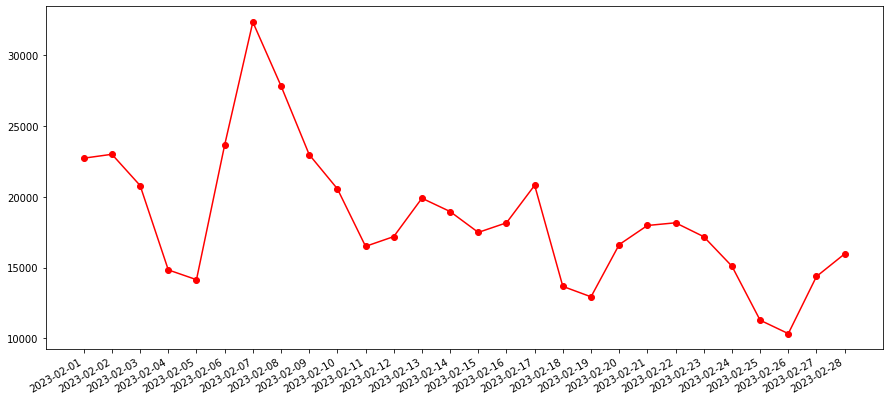

In [ ]:
plt.figure(figsize=(15,7))
x,y = list(zip(*ordered_data))

plt.plot(x,y,'ro-')
plt.gcf().autofmt_xdate()
plt.show()

## Convert .pkl to pandas DataFrame

In [ ]:
cols=[\
      'id',\
      'date',\
      'username',\
      'content',\
      'usr_label',\
      'usr_description',\
      'followersCount',\
      'friendsCount',\
      'statusesCount',\
      'favouritesCount',\
      'location',\
      'replyCount',\
      'retweetCount',\
      'quoteCount',\
      'likeCount',\
      'countryCode',\
      'country'\
      ]

In [ ]:
data = []
for tid, tweet in tweets_dict.items():
  twi = list()
  # tweet id
  twi.append(tweet.id)
  # date
  twi.append(tweet.date.strftime('%Y-%m-%d'))
  # usr name
  twi.append(tweet.username)
  # content
  twi.append(tweet.content)
  # usr label
  twi.append(tweet.user.label if tweet.user.label else np.nan)
  # usr description
  twi.append(tweet.user.description)
  # followersCount
  twi.append(tweet.user.followersCount)
  # friendsCount
  twi.append(tweet.user.friendsCount)
  # statusesCount
  twi.append(tweet.user.statusesCount)
  # favouritesCount
  twi.append(tweet.user.favouritesCount)
  # location
  twi.append(tweet.user.location)
  # replyCount
  twi.append(tweet.replyCount)
  # retweetCount
  twi.append(tweet.retweetCount)
  # quoteCount
  twi.append(tweet.quoteCount)
  # likeCount
  twi.append(tweet.likeCount)
  # countryCode
  twi.append(tweet.place.countryCode if tweet.place else np.nan)
  # country
  twi.append(tweet.place.country if tweet.place else np.nan)

  data.append(twi)
  

<ipython-input-12-69ed8cee8bde>:9: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  twi.append(tweet.username)
<ipython-input-12-69ed8cee8bde>:11: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  twi.append(tweet.content)
<ipython-input-12-69ed8cee8bde>:15: DeprecatedFeatureWarning: description is deprecated, use renderedDescription instead
  twi.append(tweet.user.description)


In [ ]:
df = pd.DataFrame(data, columns=cols)
df = df.drop_duplicates(subset=['id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300844 entries, 0 to 300843
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               300844 non-null  int64 
 1   date             300844 non-null  object
 2   username         300844 non-null  object
 3   content          300844 non-null  object
 4   usr_label        1140 non-null    object
 5   usr_description  300844 non-null  object
 6   followersCount   300844 non-null  int64 
 7   friendsCount     300844 non-null  int64 
 8   statusesCount    300844 non-null  int64 
 9   favouritesCount  300844 non-null  int64 
 10  location         300844 non-null  object
 11  replyCount       300844 non-null  int64 
 12  retweetCount     300844 non-null  int64 
 13  quoteCount       300844 non-null  int64 
 14  likeCount        300844 non-null  int64 
 15  countryCode      4815 non-null    object
 16  country          4815 non-null    object
dtypes: int64(9

In [ ]:
df.head(10)

## Statistic features

In [ ]:
df.describe()

,id,followersCount,friendsCount,statusesCount,favouritesCount,replyCount,retweetCount,quoteCount,likeCount
count,5.157480e+05,5.157480e+05,5.157480e+05,5.157480e+05,5.157480e+05,515748.000000,515748.000000,515748.000000,515748.000000
mean,1.625207e+18,4.874073e+04,1.913544e+03,3.524080e+04,1.631176e+04,1.117891,1.875897,0.249762,11.249381
std,2.857121e+15,8.583326e+05,1.325502e+04,1.244073e+05,4.389758e+04,31.067615,65.832967,11.444482,559.313697
min,1.620573e+18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.622883e+18,7.300000e+01,1.200000e+02,9.690000e+02,2.900000e+02,0.000000,0.000000,0.000000,0.000000
50%,1.624952e+18,4.130000e+02,4.230000e+02,4.871000e+03,2.545000e+03,0.000000,0.000000,0.000000,0.000000
75%,1.627657e+18,2.163000e+03,1.221000e+03,2.139000e+04,1.291300e+04,1.000000,0.000000,0.000000,2.000000
max,1.630719e+18,1.318164e+08,1.523332e+06,4.202096e+06,1.580854e+06,9834.000000,25098.000000,4186.000000,327779.000000


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Nigeria'),
  Text(8, 0, 'Kenya'),
  Text(9, 0, 'The Netherlands'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'United Arab Emirates'),
  Text(12, 0, 'I

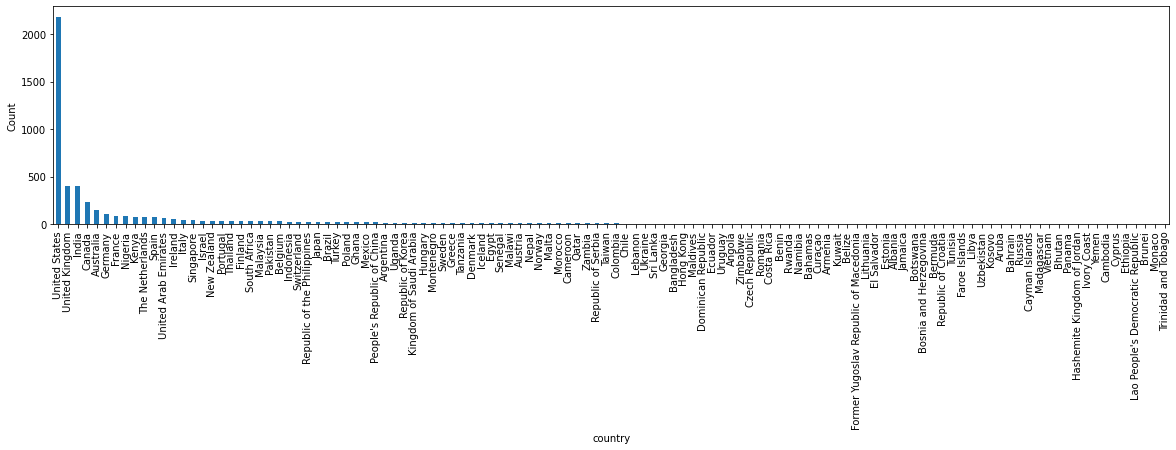

In [ ]:
df['country'].value_counts().plot(figsize=(20,4), kind='bar', xlabel='country', ylabel='Count', rot=0)
plt.xticks(rotation=90)

## Topic Modeling

In [ ]:
!pip install contractions
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 29.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#spacy
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
#vis
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Data Cleaning and Processing:

**Lower-Case Conversion:**

convert our entire text data into lowercase.

In [ ]:
# Lower-Case Conversion
def to_lowercase(text):
  return text.lower()

**Standardizing Accent Characters:**

Sometimes, people use accented characters like é, ö, etc. to signify emphasis on a particular letter during pronunciation. In some instances, accent marks also clarify the meanings of words, which might be different without accent marks. Though the use of accent marks is very limited, it’s a good practice to convert these characters into standard ASCII characters.

In [ ]:
def standardize_accented_chars(text):
  return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  
#testing the function on a single sample for explaination
print(standardize_accented_chars('Sómě words such as résumé, café, prótest, divorcé, coördinate, exposé, latté.'))

Some words such as resume, cafe, protest, divorce, coordinate, expose, latte.


**Removing URLs**

In [ ]:
def get_number_of_urls(documents):
  print("{:.2f}% of documents contain urls".format(sum(documents.apply(lambda x:x.find('http'))>0)/len(documents)*100))
  
# Passing the 'Tweets' column of the dataframe as the argument
get_number_of_urls(df.content)

43.62% of documents contain urls


In [ ]:
def remove_url(text):
  return re.sub(r'https?:\S*', '', text)

#testing the function on a single sample for explaination
print(remove_url('using https://www.google.com/ as an example'))
print(remove_url('using http://www.google.com/ as an example'))

using  as an example
using  as an example


**Expanding Contractions**

Contractions are shortened versions of words or syllables. They are created by removing, one or more letters from words. More often than not, multiple words are combined to create a contraction. For example, I will is contracted into I’ll, do not into don’t. We wouldn’t want our model to consider I will and I’ll differently. Hence, we will convert each contraction into its expanded form using the below-mentioned code.

In [ ]:
def expand_contractions(text):
  expanded_words = [] 
  for word in text.split():
    expanded_words.append(contractions.fix(word)) 
  return ' '.join(expanded_words)

#testing the function on a single sample for explaination
print(expand_contractions("Don't is same as do not"))
print(expand_contractions("I am gonna go"))
print(expand_contractions("I'll be there within 5 min. Shouldn't you be there too?\
I'd love to see u there my dear. It's awesome to meet new friends.\
We've been waiting for this day for so long."))

Do not is same as do not
I am going to go
I will be there within 5 min. Should not you be there too?I would love to see you there my dear. It is awesome to meet new friends.We have been waiting for this day for so long.


**Removing Mentions and Hashtags**

After a quick analysis, I found that in this example, mentions and hashtags don’t contribute much to the information relevant for topic modeling as they don’t follow any pattern i.e. they are randomly used in tweets. Remove mentions and tags using the function mentioned below.

In [ ]:
def remove_mentions_and_tags(text, rm_mention=True, rm_tag=False):
  if rm_mention:
    text = re.sub(r'@\S*', '', text)
  if rm_tag:
    text = re.sub(r'#\S*', '', text)
  return text

#testing the function on a single sample for explaination
print(remove_mentions_and_tags('Some random @abc and #def'))

Some random  and #def


**Keeping only Alphabet:** 

Punctuations, numbers, and special characters like ‘$, %, etc.’ don’t provide any information.

In [ ]:
def keep_only_alphabet(text):
  # if 'to_lowercase' already done:
  #text = re.sub(r'[^a-z]', ' ', text)
  # otherwise
  text = re.sub(r'[^A-z]', ' ', text)
  return text

#testing the function on a single sample for explaination
print(keep_only_alphabet('Just a bit more $$processing required.Just a #bit!!!'))

Just a bit more   processing required Just a  bit   


**Removing Stopwords(Default+Custom) and Removing Short Words:**

In [ ]:
#creating a spaCy object. 
nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])
my_stop_words = {'chatgpt', 'chatgpts', 'hey', 'hi', 'hmm', 'yo',\
'really','sometimes', 'go', 'since', 'whither', 'they', 'its', 'them',\
'well', 'meanwhile', 'seems', 'and', 'latterly', 'regarding', 'somehow',\
'sixty', 'whole', 'anyway', 'else', 'few', "'m", 'beside', 'to', 'namely',\
'someone', 'see', 'moreover', 'wherein', 'for', 'former', 'bottom', 'it',\
'next', 'six', 'along', 'once', 'might', 'whenever', 'below', 'another',\
'yourself', 'each', 'just', 'ourselves', 'everyone', 'any', 'across', \
'get', 'that', 'eight', 'we', 'which', 'therefore', 'may', "'s", 'keep',\
'among', 'give', 'such', 'are', 'indeed', 'everywhere', 'same', 'herself',\
'yourselves', 'alone', 'were', 'was', 'take', 'seem', 'say', 'why', 'show',\
'between', 'during', 'elsewhere', 'or', 'though', 'forty', 'made', 'used',\
'others', 'whereafter', 'formerly', 'several', 'via', 'does', 'please', 'three',\
'also', 'fifty', 'afterwards', "'s", 'noone', 'do', 'perhaps', 'further',\
'i', 'beforehand', 'myself', 'empty', "'ll", 'yet', 'thereby', 'been', 'both',\
'never', 'put', 'without', 'him', 'a', 'nothing', 'thereafter', 'make', 'then',\
'whom', 'must', 'sometime', 'against', 'through', 'being', 'four', 'back', 'become',\
'our', 'himself', 'because', 'anything', "'re", 'nor', 'therein', 'due', 'until',\
'own', 'ca', 'most', 'now', 'while', 'of', 'only', 'am', 'itself', 'too', "'m",\
'nobody', 'if', 'one', 'whereas', 'twelve', 'together', 'can', 'who', 'even',\
'be', 'she', 'besides', 'herein', 'off', "'d", 'last', 'no', 'whereupon', 'the', "'m",\
'thru', 'out', 'hereupon', 'by', 'us', 'already', 'became', 'here', 'hers', 'onto',\
'beyond', 'down', 'enough', 'did', 'some', 'over', 'serious', 'quite', 'move', 'around',\
'nowhere', 'amongst', 'but', 'so', 'wherever', 'twenty', 'often', 'part',\
'again', 'where', 're', 'within', 'at', "n't", 'yours', 'front', 'unless',\
'could', 'anyone', 'third', 'whatever', 'doing', "'d", 'nevertheless',\
'before', 'rather', 'fifteen', 'her', 'me', 'thereupon', 'mostly',\
'throughout', 'hence', "'re", 'mine', 'ten', 'hundred', 'nine', 'call',\
'when', 'about', 'will', 'whereby', 'this', 'upon', 'you', 'should',\
'always', 'themselves', 'not', 'has', 'behind', 'on', 'anywhere', 'side',\
'their', 'hereby', 'latter', 'after', "'ve", 'none', 'these', 'name',\
"n't", 'every', 'although', "'s", 'however', 'he', 'becoming', 'how', \
'whose', 'still', 'hereafter', 'whether', 'towards', 'more', 'everything',\
'whoever', 'seemed', 'cannot', 'up', 'otherwise', 'in', 'would', 'under',\
'done', 'thence', 'whence', 'seeming', 'either', 'other', 'with', 'into',\
'amount', 'five', 'much', "'re", 'except', 'his', 'thus', "'ll", 'what',\
'almost', 'becomes', 'least', 'ever', 'above', 'is', 'first', 'there',\
'somewhere', 'top', "'ve", 'than', "n't", 'have', 'toward', 'per', 'all',\
'ours', 'full', "'d", 'anyhow', 'as', "'ll", 'many', 'various', 'your',\
'had', 'eleven', 'from', 'something', 'less', 'those', 'using', 'an',\
'two', 'my', 'very', 'neither'}

In [ ]:
def remove_stopwords(text,nlp,custom_stop_words=None,remove_small_tokens=True,min_len=1):
  # if custom stop words are provided, then add them to default stop words list
  if custom_stop_words:
    nlp.Defaults.stop_words = custom_stop_words
  
  filtered_sentence = [] 
  doc = nlp(text)
  for token in doc:
    if token.is_stop == False: 
      # if small tokens have to be removed, then select only those which are longer than the min_len 
      if remove_small_tokens:
        if len(token.text) > min_len:
          filtered_sentence.append(token.text)
      else:
        filtered_sentence.append(token.text)

    # if after the stop word removal, words are still left in the sentence, then return the sentence as a string else return null 
  return ' '.join(filtered_sentence) if len(filtered_sentence) > 0 else np.nan

#removing stop-words and short words from every row
# tweets_df.Tweets=tweets_df.Tweets.apply(lambda x:remove_stopwords(x,nlp,{"elon","musk",}))
remove_stopwords(" chatgpt really say   socially liberal   fiscally conservative",nlp, my_stop_words)

'chatgpt    socially liberal    fiscally conservative'

**Lemmatization:**
Lemmatization generates the root of the word. It makes use of vocabulary and morphological analysis of words, to generate the root form of a word. We will use the spaCy library for performing lemmatization.

In [ ]:
def lemmatize(text, nlp):
  doc = nlp(text)
  lemmatized_text = []
  for token in doc:
    lemmatized_text.append(token.lemma_)
  return ' '.join(lemmatized_text)

#testing the function on a single sample for explaination
print(lemmatize('Reading NLP blog is fun.' ,nlp ))

#Performing lemmatization on every row
#tweets_df.Tweets=tweets_df.Tweets.apply(lambda x:lemmatize(x,nlp)

read NLP blog be fun .


**start to process our data:**

first, define the text you want to perform topic modeling:

In [ ]:
# user description
# tweets_df = df.usr_description.copy()
# tweet content
tweets_df = df.content.copy()

In [ ]:
tweets_df.head(20)

0     @ID_AA_Carmack, @lexfridman recently asked you...
1     ChatGPT's user experience and implementation '...
2     @chatgpt @openai is blowing my mind\n\nHere ar...
3      The chatGpt from openAi has some insane use case
4     I guess my other annoyance is losing the conve...
5     With some AI help, here goes my controversial ...
6     has anyone succeeded in chatGPT actually being...
7     It’s a Friday night and I’m at a bar/lounge te...
8     Todays fun is playing with #chatgpt. Here’s my...
9                       Already happening? #ChatGPT #AI
10    Liked this?! Well dont endorse it as I spent f...
11    #ChatGPT &gt; StackOverflow, proved.\nMaybe #C...
12    So far #ChatGPT handles everything I throw at ...
13    @shreyas The generic answer is correct, the sp...
14    @mtaibbi It’s taken so long because their is a...
15    Check out what I just published on Replit: Cha...
16    Does ChatGPT respond to prompts about Flesch s...
17    @RollinReisinger @xlr8harder As I mentione

In [ ]:
tweets_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 515748 entries, 0 to 515747
Series name: content
Non-Null Count   Dtype 
--------------   ----- 
515748 non-null  object
dtypes: object(1)
memory usage: 7.9+ MB


filter

In [ ]:
tweets_df = tweets_df.loc[df['likeCount'] > 2]
tweets_df

6         has anyone succeeded in chatGPT actually being...
22        @Duderichy ChatGPT really said "socially liber...
26        #ChatGPT Python code import multiple OBJs into...
27        @amasad Need to write a thread about this.\n\n...
35        I set #ChatGPT working on one of my old progra...
                                ...                        
300826                          🦾 ChatGPT winning around me
300830    gm #nftfam Let's Make Today a Good One!  Namas...
300833    .@DataChaz: 📢 New #ChatGPT extension!\n\n`Chat...
300834    I used CHATGPT to write upwork cover letters f...
300841    .@DataChaz: #ChatGPT maestro @fkadev has just ...
Name: content, Length: 72593, dtype: object

In [ ]:
# apply all the funcs
tweets_df = tweets_df\
.apply(to_lowercase)\
.apply(standardize_accented_chars)\
.apply(remove_url)\
.apply(expand_contractions)\
.apply(remove_mentions_and_tags)\
.apply(keep_only_alphabet)

In [ ]:
tweets_df_rms = tweets_df.apply(lambda x:remove_stopwords(x,nlp,my_stop_words))

In [ ]:
tweets_df_rms = tweets_df_rms.dropna()
tweets_df_rms

6         succeeded actually truly silly absurd good abs...
22              said socially liberal fiscally conservative
26            python code import multiple objs blender maya
27        need write thread today brainstorm product ide...
35        set working old programming assignments      a...
                                ...                        
300826                                              winning
300830    gm nftfam let today good namaste    nft nftcom...
300833       new extension writer chrome extension gmail...
300834    write upwork cover letters ended getting      ...
300841        maestro released book art prompting guide ...
Name: content, Length: 72111, dtype: object

In [ ]:
tweets_df = tweets_df_rms.apply(lambda x:lemmatize(x,nlp) if x else np.nan)

In [ ]:
tweets_df = tweets_df.dropna()
tweets_df

6         succeed actually truly silly absurd good absur...
22               say socially liberal fiscally conservative
26            python code import multiple objs blender maya
27        need write thread today brainstorm product ide...
35        set work old programming assignment       arti...
                                ...                        
300826                                                  win
300830    gm nftfam let today good namaste     nft nftco...
300833        new extension writer chrome extension gmai...
300834    write upwork cover letter end get       dollar...
300841         maestro release book art prompt guide cra...
Name: content, Length: 72111, dtype: object

In [ ]:
# drop rows with empty string
tweets_df = tweets_df[tweets_df.astype(bool)]
tweets_df

6         succeed actually truly silly absurd good absur...
22               say socially liberal fiscally conservative
26            python code import multiple objs blender maya
27        need write thread today brainstorm product ide...
35        set work old programming assignment       arti...
                                ...                        
300826                                                  win
300830    gm nftfam let today good namaste     nft nftco...
300833        new extension writer chrome extension gmai...
300834    write upwork cover letter end get       dollar...
300841         maestro release book art prompt guide cra...
Name: content, Length: 72111, dtype: object

### Generating Document Matrix and Dictionary:

A **document-term matrix** is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.

A **Dictionary** is collection of all unique tokens present in documents.

In [ ]:
def generate_tokens(tweet):
  words=[]
  for word in word_tokenize(tweet):
    # using the if condition because we introduced extra spaces during text cleaning
    if word != '':
       words.append(word)
  return words

#storing the generated tokens in a new column named 'words'
tweets_df['tokens']=tweets_df.apply(generate_tokens)

In [ ]:
tweets_df.tokens

6         [succeed, actually, truly, silly, absurd, good...
22         [say, socially, liberal, fiscally, conservative]
26        [python, code, import, multiple, objs, blender...
27        [need, write, thread, today, brainstorm, produ...
35        [set, work, old, programming, assignment, arti...
                                ...                        
300826                                                [win]
300830    [gm, nftfam, let, today, good, namaste, nft, n...
300833    [new, extension, writer, chrome, extension, gm...
300834    [write, upwork, cover, letter, end, get, dolla...
300841    [maestro, release, book, art, prompt, guide, c...
Name: content, Length: 72111, dtype: object

In [ ]:
def create_dictionary(words):
  return corpora.Dictionary(words)

#passing the dataframe column having tokens as the argument
id2word = create_dictionary(tweets_df.tokens)
print(id2word)

Dictionary<37633 unique tokens: ['able', 'absurd', 'absurdist', 'actually', 'boring']...>


In [ ]:
def create_document_matrix(tokens,id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus
  
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(tweets_df.tokens,id2word)
#print(tweets_df.tokens[0])
#print(corpus[0])

In [ ]:
len(corpus[0])

3

### LDA Model

reference:[genism.LDA document](https://radimrehurek.com/gensim/models/ldamodel.html)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(\
corpus=corpus,\
id2word=id2word,\
num_topics=10,\
random_state=100,
)

save the model

In [ ]:
from gensim.test.utils import datapath

# Save model to disk.
file = datapath(root+"lda_model_22Dec")
lda_model.save(file)

Load the model

In [ ]:
from gensim.test.utils import datapath

file = datapath(root+"lda_model_22Dec")
# Load a potentially pretrained model from disk.
lda_model = gensim.models.ldamodel.LdaModel.load(file)

### LDA model result vis & explore

In [ ]:
# show_topic()

def get_lda_topics(model, num_topics, top_n_words):
  word_dict = {}
  for i in range(num_topics):
    word_dict['Topic #'+ '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
  return pd.DataFrame(word_dict)
  
get_lda_topics(lda_model,10,10)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10
0,write,ai,like,model,google,openai,ask,ai,ai,code
1,ask,web,use,code,search,gpt,answer,human,art,work
2,generate,bitcoin,try,language,like,ai,question,tool,thank,like
3,ai,python,thing,gt,time,year,good,intelligence,know,generate
4,prompt,join,ask,game,use,twitter,student,new,love,use
5,story,machinelearning,way,train,day,dalle,test,future,aiart,text
6,book,nocode,know,ai,good,stablediffusion,problem,like,world,need
7,tweet,metaverse,help,text,find,use,give,think,midjourney,copy
8,post,fintech,people,learn,start,free,get,amp,artist,tool
9,create,daysofcode,explain,datum,thing,midjourney,wrong,education,bring,create


**Get the representation for a single topic:**

Words here are the actual strings, in constrast to get_topic_terms() that represents words by their vocabulary ID.

In [ ]:
# show_topics() returns (word, probability)
lda_model.show_topic(1)

[('like', 0.029191507),
 ('write', 0.022481373),
 ('know', 0.018452957),
 ('code', 0.014667037),
 ('ask', 0.014526835),
 ('good', 0.013296267),
 ('generate', 0.013064524),
 ('people', 0.01178944),
 ('work', 0.011723153),
 ('word', 0.0114967525)]

**Get the topic distribution for the given document:**

The following example means: the given tweet is most probably in topic 6, 7

In [ ]:
lda_model.get_document_topics(corpus[1], minimum_probability=None, minimum_phi_value=None, per_word_topics=False)

[(0, 0.011117182),
 (1, 0.011114335),
 (2, 0.011113715),
 (3, 0.011114799),
 (4, 0.011118634),
 (5, 0.011113304),
 (6, 0.68109703),
 (7, 0.22998236),
 (8, 0.011113584),
 (9, 0.011115062)]

### PyLDAvis visualization

[How to understand the visualization](https://community.alteryx.com/t5/Data-Science/Getting-to-the-Point-with-Topic-Modeling-Part-3-Interpreting-the/ba-p/614992)

In [ ]:
# for content ver_3.0 on 22 DEC subset
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.011183  0.051741       1        1  14.248105
6      0.044346 -0.306110       2        1  12.069566
2     -0.128649 -0.077505       3        1  11.761054
0     -0.188416  0.274068       4        1  11.069187
4      0.232296 -0.229551       5        1  11.000773
9      0.229253 -0.032125       6        1  10.826510
3      0.063211  0.314414       7        1   8.501927
5     -0.243015 -0.280225       8        1   8.066020
8     -0.361681  0.055183       9        1   6.867062
1      0.341473  0.230110      10        1   5.589796, topic_info=        Term          Freq         Total Category  logprob  loglift
50     write  11243.000000  11243.000000  Default  30.0000  30.0000
70        ai  19357.000000  19357.000000  Default  29.0000  29.0000
188   google   4518.000000   4518.000000  Default  28.0000  28.0000
29       ask   9436.000000   9436.000000  Default  27.0000  27.0000
237   answer   4109.000000   4109.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1963   space    312.358661    382.599237  Topic10  -4.9621   2.6814
70        ai   1615.001982  19357.713675  Topic10  -3.3191   0.4005
1281     nft    344.112552    710.629754  Topic10  -4.8653   2.1590
54       gpt    453.262733   3833.196323  Topic10  -4.5898   0.7492
1961   happy    297.610257    459.472727  Topic10  -5.0105   2.4499

[691 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3199      7  0.996446      act
348       3  0.169364   action
348       5  0.825266   action
749       1  0.133867      add
749       2  0.025326      add
...     ...       ...      ...
808       9  0.027466     year
808      10  0.003975     year
2624      1  0.002050  youtube
2624      4  0.867202  youtube
2624     10  0.129158  youtube

[1862 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 3, 1, 5, 10, 4, 6, 9, 2])

In [ ]:
# for content ver_3.0 in Feb 23
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.212004  0.202554       1        1  13.180215
1      0.057510  0.264569       2        1  12.765938
9     -0.040705 -0.007752       3        1  11.681439
6     -0.120375  0.318128       4        1  11.338806
0      0.056621 -0.212796       5        1  11.270624
2     -0.297464  0.132437       6        1  10.876108
5     -0.193762 -0.374854       7        1   9.330080
4     -0.345138 -0.101638       8        1   6.788663
7      0.293768 -0.238882       9        1   6.767272
8      0.377540  0.018235      10        1   6.000854, topic_info=         Term          Freq         Total Category  logprob  loglift
23         ai  35196.000000  35196.000000  Default  30.0000  30.0000
160     write  12294.000000  12294.000000  Default  29.0000  29.0000
0         ask  10617.000000  10617.000000  Default  28.0000  28.0000
24     answer   4415.000000   4415.000000  Default  27.0000  27.0000
5833     elon   2933.000000   2933.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1083      say    489.626002   3945.680788  Topic10  -4.9999   0.7265
133      well    458.715166   2972.650764  Topic10  -5.0651   0.9445
286      come    462.596504   3921.523829  Topic10  -5.0567   0.6759
23         ai    570.509734  35196.417911  Topic10  -4.8470  -1.3089
573   twitter    384.073048   1813.505701  Topic10  -5.2427   1.2611

[671 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
867       1  0.044460   academic
867       4  0.001852   academic
867       5  0.922538   academic
867       9  0.029640   academic
4662      4  0.995933     accept
...     ...       ...        ...
53       10  0.065555        yes
1558      3  0.995694  yesterday
1031     10  0.997885      young
2659      4  0.991002    youtube
2659      7  0.008809    youtube

[1842 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 10, 7, 1, 3, 6, 5, 8, 9])